# 数据集准备及预处理

In [1]:
import torch
print(torch.__version__)

1.13.1+cpu


In [2]:
"""
下载MNIST数据集脚本
"""

import os
from pathlib import Path
import logging

import wget

logging.basicConfig(level=logging.INFO, format="%(message)s")


def download_minst(save_dir: str = None) -> bool:
    """下载MNIST数据集
    输入参数:
        save_dir: MNIST数据集的保存地址. 类型: 字符串.

    返回值:
        全部下载成功返回True, 否则返回False
    """
    
    save_dir = Path(save_dir)
    train_set_imgs_addr = save_dir / "train-images-idx3-ubyte.gz"
    train_set_labels_addr = save_dir / "train-labels-idx1-ubyte.gz"
    test_set_imgs_addr = save_dir / "t10k-images-idx3-ubyte.gz"
    test_set_labels_addr = save_dir / "t10k-labels-idx1-ubyte.gz"

    try:
        if not os.path.exists(train_set_imgs_addr):
            logging.info("下载train-images-idx3-ubyte.gz")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", out=str(train_set_imgs_addr))
            logging.info("\tdone.")
        else:
            logging.info("train-images-idx3-ubyte.gz已经存在.")

        if not os.path.exists(train_set_labels_addr):
            logging.info("下载train-labels-idx1-ubyte.gz.")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", out=str(train_set_labels_addr))
            logging.info("\tdone.")
        else:
            logging.info("train-labels-idx1-ubyte.gz已经存在.")

        if not os.path.exists(test_set_imgs_addr):
            logging.info("下载t10k-images-idx3-ubyte.gz.")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", out=str(test_set_imgs_addr))
            logging.info("\tdone.")
        else:
            logging.info("t10k-images-idx3-ubyte.gz已经存在.")

        if not os.path.exists(test_set_labels_addr):
            logging.info("下载t10k-labels-idx1-ubyte.gz.")
            filename = wget.download(url="http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz", out=str(test_set_labels_addr))
            logging.info("\tdone.")
        else:
            logging.info("t10k-labels-idx1-ubyte.gz已经存在.")
        
    except:
        return False
    
    return True


download_minst('./input')



train-images-idx3-ubyte.gz已经存在.
train-labels-idx1-ubyte.gz已经存在.
t10k-images-idx3-ubyte.gz已经存在.
t10k-labels-idx1-ubyte.gz已经存在.


True

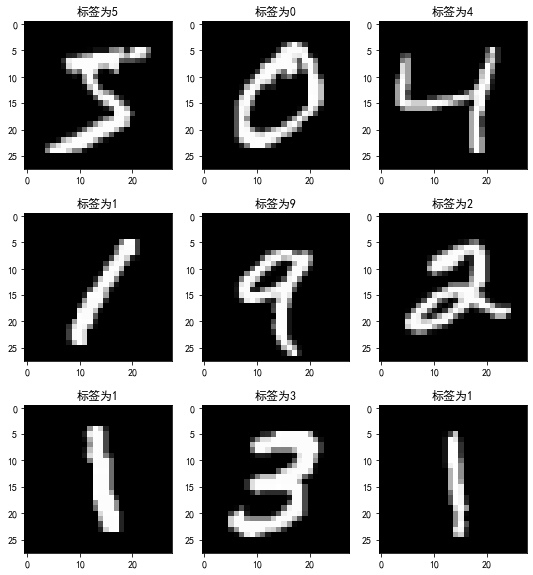

In [3]:
"""
通过gzip和numpy解析MNIST数据集的二进制文件, 并可视化训练集前10张图片和标签
"""

import os
import gzip
import logging

import numpy as np
import matplotlib.pyplot as plt

logging.basicConfig(format="%(message)s", level=logging.DEBUG)  # 设置Python日志管理工具的消息格式和显示级别

plt.rcParams["font.sans-serif"] = "SimHei"  # 确保plt绘图正常显示中文
plt.rcParams["figure.figsize"] = [9, 10]  # 设置plt绘图尺寸

def parse_mnist(minst_file_addr: str = None) -> np.array:
    """解析MNIST二进制文件, 并返回解析结果
    输入参数:
        minst_file: MNIST数据集的文件地址. 类型: 字符串.

    返回值:
        解析后的numpy数组
    """
    if minst_file_addr is not None:
        minst_file_name = os.path.basename(minst_file_addr)  # 根据地址获取MNIST文件名字
        with gzip.open(filename=minst_file_addr, mode="rb") as minst_file:
            mnist_file_content = minst_file.read()
        if "label" in minst_file_name:  # 传入的为标签二进制编码文件地址
            data = np.frombuffer(buffer=mnist_file_content, dtype=np.uint8, offset=8)  # MNIST标签文件的前8个字节为描述性内容，直接从第九个字节开始读取标签，并解析
        else:  # 传入的为图片二进制编码文件地址
            data = np.frombuffer(buffer=mnist_file_content, dtype=np.uint8, offset=16)  # MNIST图片文件的前16个字节为描述性内容，直接从第九个字节开始读取标签，并解析
            data = data.reshape(-1, 28, 28)
    else:
        logging.warning(msg="请传入MNIST文件地址!")

    return data


if __name__ == "__main__":
    train_imgs = parse_mnist(minst_file_addr="./input/train-images-idx3-ubyte.gz")  # 训练集图像
    train_labels = parse_mnist(minst_file_addr="./input/train-labels-idx1-ubyte.gz")  # 训练集标签
    
    # 可视化
    fig, ax = plt.subplots(ncols=3, nrows=3)
    ax[0, 0].imshow(train_imgs[0], cmap=plt.cm.gray)
    ax[0, 0].set_title(f"标签为{train_labels[0]}")
    ax[0, 1].imshow(train_imgs[1], cmap=plt.cm.gray)
    ax[0, 1].set_title(f"标签为{train_labels[1]}")
    ax[0, 2].imshow(train_imgs[2], cmap=plt.cm.gray)
    ax[0, 2].set_title(f"标签为{train_labels[2]}")
    ax[1, 0].imshow(train_imgs[3], cmap=plt.cm.gray)
    ax[1, 0].set_title(f"标签为{train_labels[3]}")
    ax[1, 1].imshow(train_imgs[4], cmap=plt.cm.gray)
    ax[1, 1].set_title(f"标签为{train_labels[4]}")
    ax[1, 2].imshow(train_imgs[5], cmap=plt.cm.gray)
    ax[1, 2].set_title(f"标签为{train_labels[5]}")
    ax[2, 0].imshow(train_imgs[6], cmap=plt.cm.gray)
    ax[2, 0].set_title(f"标签为{train_labels[6]}")
    ax[2, 1].imshow(train_imgs[7], cmap=plt.cm.gray)
    ax[2, 1].set_title(f"标签为{train_labels[7]}")
    ax[2, 2].imshow(train_imgs[8], cmap=plt.cm.gray)
    ax[2, 2].set_title(f"标签为{train_labels[8]}")
    plt.show()  # 显示绘图

    # print(plt.rcParams.keys())



In [4]:
print(train_imgs.shape)
print(train_labels.shape)
print(train_imgs[0])

(60000, 28, 28)
(60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

# ⭐网络定义

In [10]:
from torch import nn
import torch.nn.functional as F

class Mnist_NN(nn.Module):
    def __init__(self):
        # super()加括号
        super().__init__()
        self.hidden1=nn.Linear(784, 128)
        self.hidden2=nn.Linear(128, 256)
        self.out=nn.Linear(256, 10)
        self.dropout=nn.Dropout(0.5)
    
    def forward(self, x):
        x=F.relu(self.hidden1(x))
        x=self.dropout(x)
        x=F.relu(self.hidden2(x))
        x=self.dropout(x)
        x=self.out(x)
        return x
        

In [11]:
net = Mnist_NN()
print(net)

Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [13]:
# 打印网络中的权重和偏置项

for name, params in net.named_parameters():
    print(name, params, params.shape)

hidden1.weight Parameter containing:
tensor([[-0.0198, -0.0030,  0.0156,  ...,  0.0002,  0.0280, -0.0288],
        [-0.0278, -0.0279, -0.0231,  ..., -0.0197,  0.0142, -0.0141],
        [-0.0355,  0.0282,  0.0280,  ...,  0.0111,  0.0305, -0.0334],
        ...,
        [-0.0057, -0.0008,  0.0322,  ...,  0.0322,  0.0066,  0.0191],
        [ 0.0205,  0.0289,  0.0022,  ...,  0.0219,  0.0330,  0.0235],
        [ 0.0117, -0.0181,  0.0216,  ...,  0.0131, -0.0186,  0.0055]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 1.3103e-02,  2.8438e-02, -1.0083e-02,  6.3774e-03,  2.3302e-05,
        -3.1514e-02,  2.4512e-02,  2.0390e-02, -1.2503e-02,  3.4174e-03,
        -2.2131e-02, -5.7559e-03, -2.9135e-02,  1.1883e-02,  8.1765e-03,
         3.3970e-02,  1.1341e-02, -1.4695e-02, -1.5308e-02, -1.7665e-03,
        -1.1653e-03, -1.6147e-02, -3.3864e-02, -2.4299e-02, -3.2299e-02,
         2.5596e-02,  1.0792e-02, -2.9264e-02,  3.3947e-02,  1.1794e-02,
      

In [ ]:
# 准备数据集
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)



# 训练

In [ ]:
import numpy as np

def train(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(steps):
        # 指定model的模式
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, )
        # 指定验证模式
        model.eval()
        # 不更新权重
        with torch.no_grad():